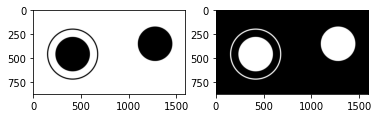

100435.5
single contour check 0
205487.0
single contour check 2
221842.5
single contour check 2
100462.5
single contour check 0


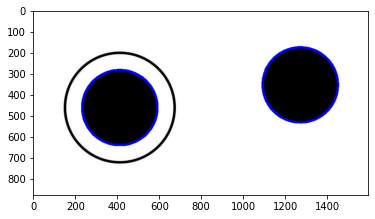

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img_path = r"/content/drive/My Drive/acviss/Assignment.png"

def display_image(img ) :
  plt.imshow(img,'gray')
  plt.show()
def display_two_image(img1 , img2 ) :
  plt.subplot(121),plt.imshow(img1 , 'gray')
  plt.subplot(122),plt.imshow(img2 , 'gray')
  plt.show()


def check_contour(img_check , cnt) :
  ###########To extract only black solid circles
  img_cp = np.zeros_like(img_check)
  cv2.drawContours(img_cp, [cnt], -1, (255,255,255), -1)
  img_and = cv2.bitwise_and(img_cp , img_check)
  ret, thresh12 = cv2.threshold(img_and, 200, 255, cv2.THRESH_BINARY)
  contours_single, hier = cv2.findContours(thresh12, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
  print('single contour check' , len(contours_single))
  if len(contours_single) > 0 :
      return False
  else :
      return True


img = cv2.imread(img_path , 0)
img_org= cv2.imread(img_path)

#bitwise not image so you can extract the contours, visualize purpose 
not_img = cv2.bitwise_not(img)

ret,thresh1 = cv2.threshold(not_img,200,255,cv2.THRESH_BINARY)
contours,hier = cv2.findContours(thresh1, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
display_two_image(img , not_img)

for indcnt in contours :
  print(cv2.contourArea(indcnt))
  #to extract only black / white solid circles 
  if check_contour(img, indcnt) :
      cv2.drawContours(img_org , [indcnt] , -1 , (0,0,255) , 10 )

display_image(img_org)